In [2]:
import torch 
from torch import nn 
from d2l import torch as d2l

net = nn.Sequential(
    #第一层卷积
    #11*11
    #stride=4
    #增加通道数
    nn.Conv2d(1,96,kernel_size=11,stride=4,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    #第二层卷积
    nn.Conv2d(96,256,kernel_size=5,padding=2),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    #使用三个卷积和较小的卷积窗口、
    #通道数量进一步增加
    #宽高不变
    nn.Conv2d(256,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,256,kernel_size=3,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Flatten(),
    nn.Linear(6400, 4096),nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096,4096),nn.ReLU(),
    nn.Dropout(p=0.5),
    
    #输出层
    nn.Linear(4096,10))

In [3]:
X = torch.randn(1,1,224,224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

In [4]:
batch_size = 128
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size,resize=224)

loss 0.329, train acc 0.879, test acc 0.882
900.9 examples/sec on cuda:0


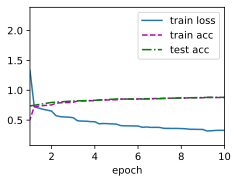

In [6]:
lr,num_epochs = 0.01,10
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

loss 0.280, train acc 0.897, test acc 0.891
930.2 examples/sec on cuda:0


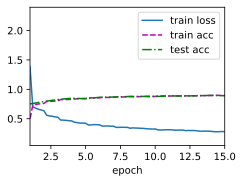

In [7]:
lr,num_epochs = 0.01,15
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())

loss 0.232, train acc 0.913, test acc 0.907
942.7 examples/sec on cuda:0


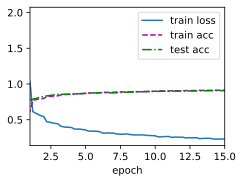

In [8]:
lr,num_epochs = 0.02,15
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,d2l.try_gpu())